# Pagerank Algorithm

In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)

In [2]:
# generate random network (adjuscency matrix A)
# and importance of its nodes (Y)
def generate_Adj(n_node = 10, alpha=0.5):
    X = np.random.exponential(size=n_node*2).reshape([n_node, 2])
    Y = alpha * np.random.exponential(size=n_node).reshape([1, n_node])
    E_numlink = X @ X.T * Y
    A0 = np.random.poisson(E_numlink)
    A  = A0 - np.diag(np.diag(A0))
    return A, np.squeeze(Y)

In [3]:
# Visualize the network specified by matrix A
def plot_network(A,Y=1):
    
    n_node = A.shape[0]
    phases = - 2*np.pi*np.arange(n_node)/n_node + (1/2) * np.pi
    xs = np.cos(phases)
    ys = np.sin(phases)
    
    plt.scatter(xs, ys, s=100*Y)
    shift = 0.02

    for x,y,s in zip(xs+shift, ys+shift, np.arange(10)):
        plt.text(x,y,s)

    for i in range(n_node):
        for j in range(n_node):
            if A[i,j]>0:
                x, y  = xs[i], ys[i]
                dx,dy = xs[j]-xs[i], ys[j]-ys[i]
                dr    = (dx**2 + dy**2)**(1/2)
                dx,dy = dx-(0.1/dr)*dx, dy-(0.1/dr)*dy
                plt.arrow(x, y, dx, dy, color='black', alpha=min(1,0.05*A[i,j]), width=min(0.5,0.003*A[i,j]), head_width=0.05)
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    plt.axis('off')

In [4]:
# Calculate limit distribution of random walk
# and visualize the results.
def plot_lim_dist(A,Y=None):
    n_node = A.shape[0]
    T = A + np.eye(n_node) 
    P = T/T.sum(axis=1)
    eigs, Vs = np.linalg.eig(P.T)
    lim_dist = np.abs(Vs[:,eigs>=0.99].T)
    
    for v in lim_dist:
        plt.bar(x=np.arange(n_node), height=v/sum(v), alpha=0.3)
    
    leg = ['lim dist. #{}'.format(i) for i in range(len(lim_dist))]
    
    if Y is not None:
        plt.bar(x=np.arange(n_node), height=Y/sum(Y), alpha=0.2, color='gray')
        plt.legend(leg+['Y'])
    else:
        plt.legend(leg)

# Visualize the Network and its Limit Distribution

In [5]:
A,_ = generate_Adj(10, 0.5)

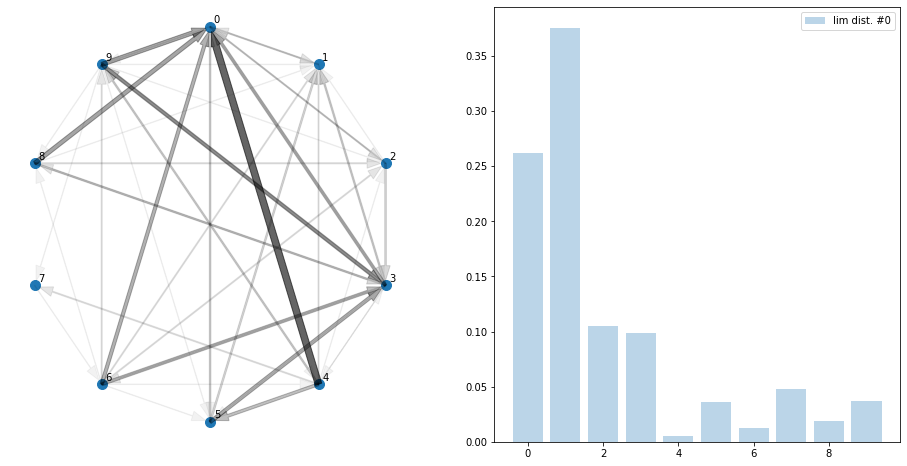

In [6]:
plt.figure(figsize=[16,8])
plt.subplot(1,2,1)
plot_network(A,1)
plt.subplot(1,2,2)
plot_lim_dist(A)